# Visualization and Learning in Julia

Tom Breloff

https://github.com/tbreloff

### My background
- BA Mathematics and Economics (U. of Rochester)
- MS Mathematics (NYU Courant Institute)
- Trader, researcher, quant, developer at several big banks and hedge funds, including one which I founded
- High speed algorithmic arbitrage trading and market making
- Machine learning and visualization enthusiast
- Lifelong programmer (since learning BASIC in 4th grade)

### Before Julia
- Python and C/C++
- MATLAB and Java (so many files!!)
- Throughout the years: Mathematica, Go, R, C#, Javascript, Visual Basic/Excel, Lisp, Erlang, ...

### Things I liked from those languages
- Python
    - Solid packages
    - Easy to get stuff done
- C/C++
    - Fast (when you put in the effort)
- MATLAB
    - Great matrix operations
    - Easy visualizations
- Java
    - Hmmm... I broke my record for the longest function name ever?
- Go
    - Channels and green threads

### What about Julia?
- Easy to code
- Fast with little effort
- Solid vector/matrix support, but more flexible
- Macros and staged functions
- etc

(Slow clap...)

### Visualization in Julia
- Lots of packages: Gadfly, PyPlot, Vega, Winston, UnicodePlots, Qwt, Bokeh, Immerse ...
- Some are interactive (Immerse, PyPlot, Qwt)
- Some call other languages (PyPlot, Qwt, Vega, Bokeh)
- Some are native (Gadfly, Winston)
- Some are pretty (Gadfly, Vega)
- Some are fast and easy (UnicodePlots, Qwt, Winston)
- Some are feature-full (PyPlot)
- Why do I have to choose one?!?

### Good design: AbstractArray
Many concrete array-types:
- Dense arrays
- Sparse arrays
- Ranges
- Distributed arrays
- Shared arrays
- GPU arrays
- Custom data structures

Common code is implemented once for AbstractArray, and all concrete types get the benefit.

In [1]:
using StatsBase

# implementation
type ScaryVector <: AbstractVector{Int}
    boo::Int
    n::Int
    ScaryVector(n::Integer) = new(sample(1:n), n)
end
Base.length(sv::ScaryVector) = sv.n
Base.size(sv::ScaryVector) = (sv.n,)
Base.getindex(sv::ScaryVector, i::Integer) = (i == sv.boo ? "BOO!" : i)

# test it out
sv = ScaryVector(5)

5-element ScaryVector:
 1      
 2      
  "BOO!"
 4      
 5      

In [2]:
filter(x -> isa(x, Number), sv)

4-element Array{Int64,1}:
 1
 2
 4
 5

### Good design: AbstractArray
- Inheriting from AbstractArray gives you a lot "for free":
    - Iteration (`map`, `for x in ...`, `filter`, ...)
    - Operations
    - Printing
    - etc
- Few methods to implement... only what's needed.
- Abstractions put overlapping functionality in one place
    - Easy to code
    - Easy to maintain
    
Imagine if there were no AbstractArray...

### Gadfly : `____________` :: ScaryVector : AbstractArray

Thinking of graphics packages as concrete types, we see that we have many different types, but no abstraction linking them together. 

## Plots.jl
The AbstractArray of plotting...

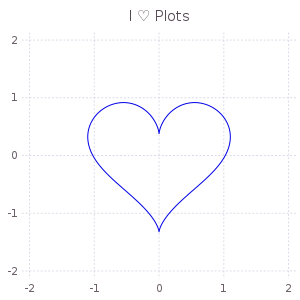

In [8]:
using Plots
gadfly()
default(size=(300,300), legend=false)
fx(u) = 1.1sin(u)^3
fy(u) = cos(u) - 0.4cos(2u) - 0.15cos(3u) - cos(4u)/13
plot(fx, fy, 0, 2π, leg=false, xlim=(-2,2), ylim=(-2,2))
title!("I ♡ Plots")

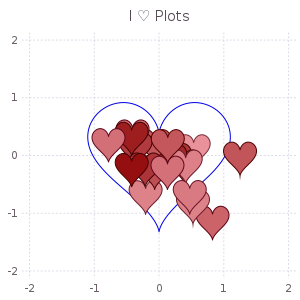

In [9]:
us = linspace(0, 2π, 100)
heart = Shape([(fx(u), -fy(u)) for u in us])
x, y, z = Vector[0.5randn(20) for i in 1:3]
scatter!(x, y, z=z, c=:reds, m=(heart,15))

Credits for the dataset:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.